In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install av
!pip install body-matrix==0.3.9

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 31.4/31.4 MB 51.5 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


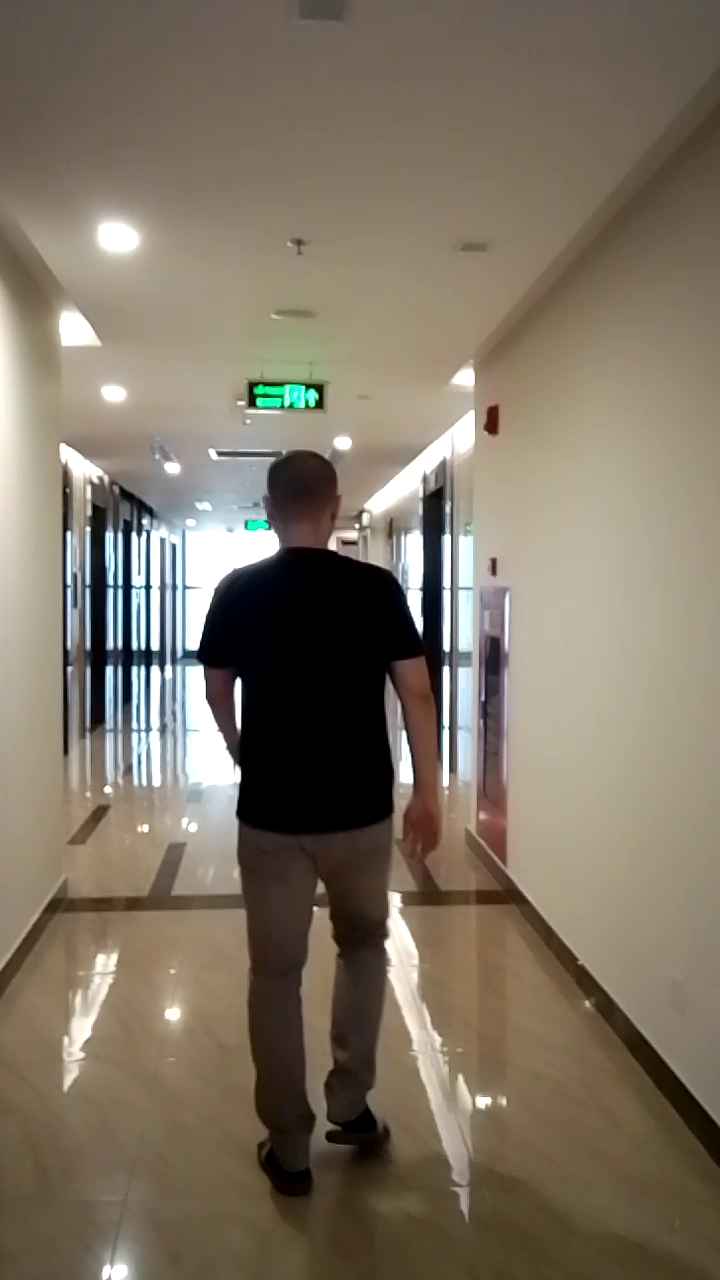

In [20]:
from body_matrix import load, infer, process, measure, draw, export

video_path = "/content/drive/MyDrive/Body_Matrix/man_01.mp4"
video_rotate = 90
device = "cuda"
font_path = "/content/drive/MyDrive/Body_Matrix/Roboto-Bold.ttf"

keypoints_model, keypoints_transform = load.keypoints_model(device)
segment_model, segment_transform = load.segment_model(device)

video, frame_counts, fps, sample_frame = load.video(
    video_path=video_path, 
    rotate_angle=video_rotate,
    frame_position=1
)

sample_frame

In [22]:
from torchvision.transforms.functional import to_pil_image

measure_frames = []
measures = []

for index, vid_frame in enumerate(video):
    frame = to_pil_image(vid_frame)
    frame = frame.rotate(video_rotate, expand=True)
    height, leg, hip, shoulder, markers = measure.find_real_measures(
        image_frame=frame,
        device=device,
        keypoints_model=keypoints_model,
        keypoints_transform=keypoints_transform,
        segment_model=segment_model,
        segment_transform=segment_transform
    )

    visualized_frame = draw.visualize_measures(
        height, leg, hip, shoulder, markers, 
        frame, font_path
    )

    measure_frames.append(visualized_frame)
    measures.append(height)

Found  1  person in the frame
Distances:  [40.33509826660156]
Areas:  [187932.18996662088]
FOCUSES:  [4659.271900726551]
Select keypoint index 0
Found  1  person in the frame
[194.3692169189453, 451.3774108886719, 438.2704162597656, 1200.620361328125]
[195.90823364257812, 445.71258544921875, 443.42156982421875, 1204.99365234375]
[3.4068475036138954]
3.4068475036138954 0
Found  1  person in the frame
Distances:  [36.48490905761719]
Areas:  [189190.3208592208]
FOCUSES:  [5185.440384693034]
Select keypoint index 0
Found  1  person in the frame
[190.65020751953125, 444.9404602050781, 448.256103515625, 1197.6370849609375]
[196.62033081054688, 452.7584533691406, 450.40985107421875, 1198.219970703125]
[5.843202118244096]
5.843202118244096 0
Found  1  person in the frame
Distances:  [31.773757934570312]
Areas:  [186146.3914394444]
FOCUSES:  [5858.494667919478]
Select keypoint index 0
Found  1  person in the frame
[195.76388549804688, 444.78662109375, 444.5697326660156, 1201.7603759765625]
[204

167.29506875921035 168.94501606106894


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


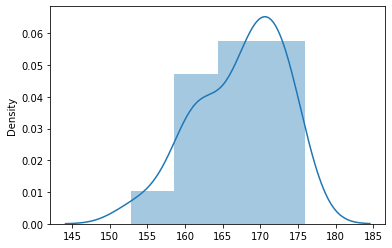

In [23]:
from body_matrix import score

mean, median, minim, maxim = score.best_scores(
    measures,
    100, 
    200
)

best_score, frame_index = score.find_nearest(
    measures, 
    median
)

In [25]:
export.generate_instagram_vid(
    vid_name="instameasures_hoangdo.mp4", 
    vid_width = sample_frame.width, 
    vid_height = sample_frame.height, 
    pil_images = measure_frames, 
    stop_index=frame_index, 
    fps=fps, 
    repeat_rate=2, 
    slow_motion_rate=1
)

Total Frames is  132
0 0
1 0
2 0
3 0
4 0
5 0
6 0
7 0
8 0
9 0
10 0
11 0
12 0
13 0
14 0
15 0
16 0
17 0
18 0
19 0
20 0
21 0
22 0
23 0
24 0
25 0
26 0
27 0
28 0
29 0
30 0
31 0
32 0
32 1
32 1
32 1
32 1
32 1
32 1
32 1
32 1
32 1
32 1
32 1
32 1
32 1
32 1
32 1
32 1
32 1
32 1
32 1
32 1
32 1
32 1
32 1
32 1
32 1
32 1
32 1
32 1
32 1
32 1
32 1
32 1
32 1
0 2
1 2
2 2
3 2
4 2
5 2
6 2
7 2
8 2
9 2
10 2
11 2
12 2
13 2
14 2
15 2
16 2
17 2
18 2
19 2
20 2
21 2
22 2
23 2
24 2
25 2
26 2
27 2
28 2
29 2
30 2
31 2
32 2
32 3
31 3
30 3
29 3
28 3
27 3
26 3
25 3
24 3
23 3
22 3
21 3
20 3
19 3
18 3
17 3
16 3
15 3
14 3
13 3
12 3
11 3
10 3
9 3
8 3
7 3
6 3
